                     GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP) - THE SPARKS FOUNDATION 

NAME   : THANUJA B
DOMAIN : DATA SCIENCE & BUSINESS ANALYTICS
TASK 1   : PREDICTION USING SUPERVISED ML
BATCH  : JUNE 2023

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Reading a dataset
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#Analyzing data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

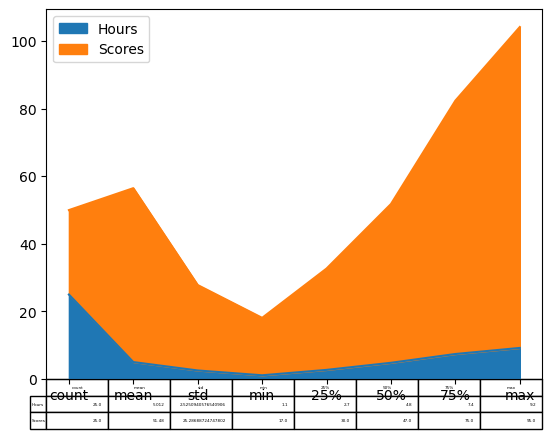

In [9]:
df.describe().plot(kind='area',table=True)

#Our goal is to predict the percentage of a student based on the no. of study hours
#As, there are only 2 columns ,among which one is the feature and the other one is the target
#Hours can be considered as feature variable & Scores as target variable

C:\Users\THANUJA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


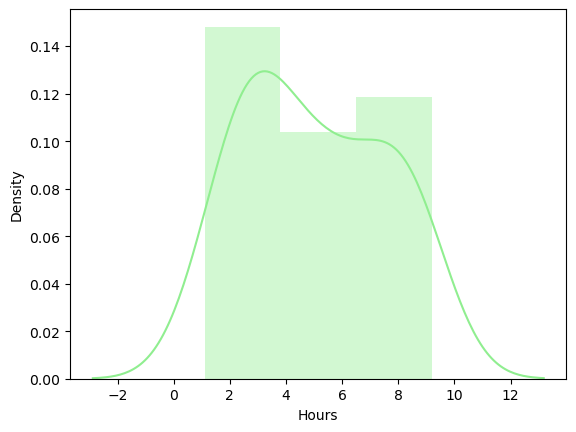

In [10]:
#The feature variable here is a numerical one
#Numerical feature analysis

sns.distplot(df['Hours'],color='lightgreen')
plt.show()

#Observation : We observe that the studying hours ranges from 1 to 9 approximately

In [12]:
#Here, the independent variable is no. of hours and the dependent variable is scores.
x= df.drop('Scores',axis=1) 
y= df.drop('Hours',axis=1)  
#for x variable, we have taken -1 value since we want to remove the last column from the dataset. 
#For y variable, we have taken 1 value as a parameter,
#since we want to extract the second column and indexing starts from the zero.


In [14]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0) 

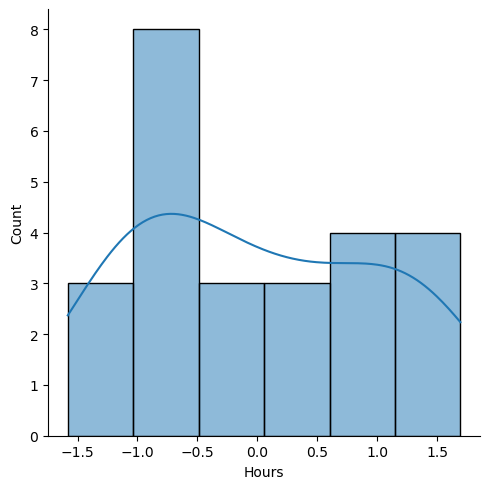

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x['Hours']=ss.fit_transform(x[['Hours']])

#Visualization
sns.displot(x='Hours',data=x,palette='viridis',kde=True)
plt.show()

In [22]:
# Building model
#Fitting the Simple Linear Regression model to the training dataset  
from sklearn.linear_model import LinearRegression  
lr= LinearRegression()  
lr.fit(x_train, y_train) 
res_tlr=lr.predict(x_train)
res_lr=lr.predict(x_test)
res_lr

array([[17.04289179],
       [33.51695377],
       [74.21757747],
       [26.73351648],
       [59.68164043],
       [39.33132858],
       [20.91914167],
       [78.09382734],
       [69.37226512]])

In [23]:
#8. Evaluation metrics
#(a.) R-Squared
from sklearn.metrics import r2_score
r2=r2_score(y_test,res_lr)
r2

0.9555700801388128

In [24]:
#(b.) MAE and MSE
mae=metrics.mean_absolute_error(y_test,res_lr)
mse=metrics.mean_squared_error(y_test,res_lr)
print('Mean Absolute Error : ',mae)
print('Mean Squared Error : ',mse)

Mean Absolute Error :  4.6913974413974415
Mean Squared Error :  25.463280738222593


In [25]:
#(c.) RMSE
from math import sqrt
rmse=sqrt(mse)
print('Root Mean Squared Error : ',rmse)

Root Mean Squared Error :  5.046115410711748


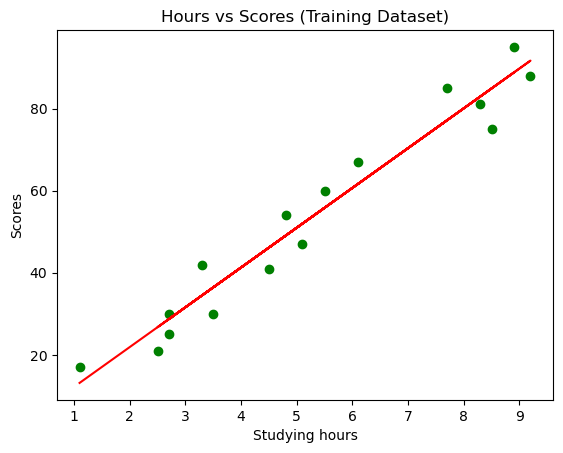

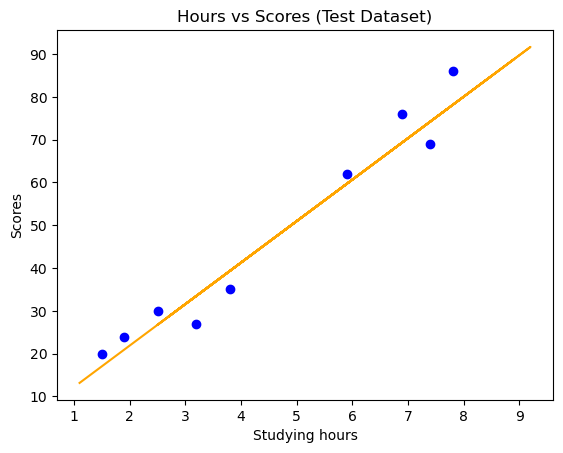

In [28]:
#Step: 4. visualizing the Training set results:

plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, res_tlr, color="red")    
plt.title("Hours vs Scores (Training Dataset)")  
plt.xlabel("Studying hours")  
plt.ylabel("Scores")  
plt.show()   

#visualizing the Test set results  
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, res_tlr, color="orange")    
plt.title("Hours vs Scores (Test Dataset)")  
plt.xlabel("Studying hours")  
plt.ylabel("Scores")  
plt.show()  

In [29]:
#Predictive system

i=float(input('Enter studying hours of a student : '))

Enter studying hours of a student : 9.25


In [30]:
i_array=np.array(i)
i_array=i_array.reshape(1,-1)
ans=lr.predict(i_array)
print('The Percentage of this student is predicted as ',ans[0])

The Percentage of this student is predicted as  [92.14523315]


C:\Users\THANUJA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
